### Edgar Moises Hernandez-Gonzalez
#### 29/03/20-01/04/20
#### Clasificacion de CIFAR10 con Transfer Learning usando VGG16
##### class_names = ['avion', 'auto', 'pajaro', 'gato', 'venado', 'perro', 'rana', 'caballo', 'barco', 'camion']
##### Accuracy = 60.76%

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, classification_report

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [0]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 50000
n_samples_test : 10000


In [0]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test
print("n_classes:", n_classes)

n_classes: 10


In [0]:
#convertir a float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#escalar los valores en un rango de 0 a 1 (normalizar)
x_train /= 255.0
x_test /= 255.0

In [0]:
base_model = VGG16(weights='imagenet',
                   include_top=False,
                   input_shape=x_train.shape[1:])

In [0]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [0]:
#Extraccion de caracteristicas con VGG16
x_train = base_model.predict(x_train)
print(x_train.shape)

x_test = base_model.predict(x_test)
print(x_test.shape)

(50000, 1, 1, 512)
(10000, 1, 1, 512)


In [0]:
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 33,482
Trainable params: 33,482
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(x_train, y_train, epochs=20, batch_size=128,
                    validation_data=(x_test, y_test), verbose=2)

Epoch 1/20
391/391 - 1s - loss: 1.6085 - accuracy: 0.4377 - val_loss: 1.3512 - val_accuracy: 0.5313
Epoch 2/20
391/391 - 1s - loss: 1.3355 - accuracy: 0.5367 - val_loss: 1.2720 - val_accuracy: 0.5551
Epoch 3/20
391/391 - 1s - loss: 1.2665 - accuracy: 0.5571 - val_loss: 1.2265 - val_accuracy: 0.5747
Epoch 4/20
391/391 - 1s - loss: 1.2270 - accuracy: 0.5715 - val_loss: 1.2008 - val_accuracy: 0.5792
Epoch 5/20
391/391 - 1s - loss: 1.1972 - accuracy: 0.5817 - val_loss: 1.1866 - val_accuracy: 0.5855
Epoch 6/20
391/391 - 1s - loss: 1.1749 - accuracy: 0.5908 - val_loss: 1.1696 - val_accuracy: 0.5933
Epoch 7/20
391/391 - 1s - loss: 1.1576 - accuracy: 0.5956 - val_loss: 1.1623 - val_accuracy: 0.5957
Epoch 8/20
391/391 - 1s - loss: 1.1421 - accuracy: 0.6004 - val_loss: 1.1618 - val_accuracy: 0.5933
Epoch 9/20
391/391 - 1s - loss: 1.1279 - accuracy: 0.6077 - val_loss: 1.1504 - val_accuracy: 0.6003
Epoch 10/20
391/391 - 1s - loss: 1.1164 - accuracy: 0.6112 - val_loss: 1.1552 - val_accuracy: 0.5963

In [0]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 - 0s - loss: 1.1244 - accuracy: 0.6076
Test loss: 1.1244350671768188
Test accuracy: 0.6075999736785889


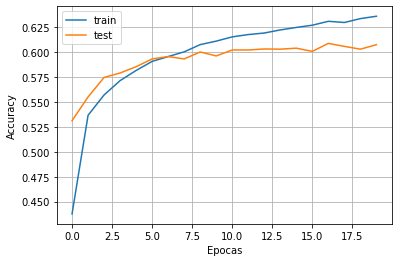

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

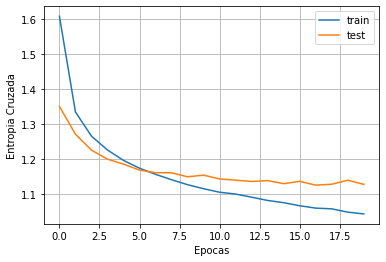

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()

In [0]:
probabilidades = model.predict(x_test)
y_pred = np.argmax(probabilidades, 1) #1=fila

In [0]:
matrizConfusion = confusion_matrix(y_test, y_pred)
print(matrizConfusion)

[[698  36  64   9  11   8   8  26 112  28]
 [ 41 715  19  28   8  12  18  20  43  96]
 [ 72  24 495  61 119  52  86  58  18  15]
 [ 24  48  68 419  66 130 101  56  27  61]
 [ 20  17  74  54 565  20  99 105  32  14]
 [  9  31  58 193  71 464  40  89  14  31]
 [  8  37  59  78  81  33 659  13  15  17]
 [ 16  20  38  32  64  44  13 721  17  35]
 [ 72  63  17  13  12   3   9  10 761  40]
 [ 51 165  13  31  14  17  11  57  62 579]]


In [0]:
reporteClassificacion = classification_report(y_test, y_pred)
print(reporteClassificacion)

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1000
           1       0.62      0.71      0.66      1000
           2       0.55      0.49      0.52      1000
           3       0.46      0.42      0.44      1000
           4       0.56      0.56      0.56      1000
           5       0.59      0.46      0.52      1000
           6       0.63      0.66      0.64      1000
           7       0.62      0.72      0.67      1000
           8       0.69      0.76      0.72      1000
           9       0.63      0.58      0.60      1000

    accuracy                           0.61     10000
   macro avg       0.60      0.61      0.60     10000
weighted avg       0.60      0.61      0.60     10000

